## DATA 558: Homework 1

Geoffrey Li

April 12, 2019

In [35]:
import pandas as pd
import numpy as np

## Problem 2

<i>
Explain whether each scenario is a classification or regression problem, and indicate
whether we are most interested in inference or prediction. Finally, provide n and p.
</i>

<i>
(a) You want to predict whether a particular customer is going to click on an online advertisement or not. You have information on whether or not they clicked on 200 other ads, in addition to whether the ad was in the same category, whether the ad was shown during regular working hours, whether the ad was shown on a weekend, and the percent of all customers who had previously clicked on the ad.
</i>

This is a classification problem: we are trying to classify whether the customer will click an advertisement or not (two-classes). We are most interested in prediction of whether the customer will click the advertisement or not; inference is less important.

n = 200, p = 4

<i> 
(b) Suppose it is the end of the quarter and you wish to predict your score on the final exam. You have data from 20 classes you have previously taken, consisting of your final exam scores, your average scores on the midterms (i.e., one average midterm score per class), your average homework scores (i.e., one average homework score per class), and whether the final exam was take-home or not.
</i>

This is a regression problem: we are trying to predict a quantitative response variable (score on the final exam). We are most interested in prediction of the final score (less interested in the factors that are associated with that final score).

n = 20, p = 4

<i>
(c) You work for an ice cream shop and are in charge of determining what factors affect how much ice cream is sold each day. For 300 days you have information on how much ice cream the shop sold, in addition to whether the day was sunny or not, what the temperature was, whether school is in session or not, whether your most popular flavor was available that day, and whether you had recently run any advertisements.
</i>

Since the response variable is quantitative (amount of ice cream sold each day), this can be constructed as a regression problem. We're interested in inference: the relative weights of the association of the predictor variables to evaluate which factors are more important and which are less important for determining how much ice cream is sold each day.

n = 300, p = 6

## Problem 3

<i>
In this problem you will brainstorm real-life applications for statistical learning. Your answers aren’t allowed to be the same as any of the examples in the other homework problems.
</i>

<i>
(a) Describe three real-life applications in which classification might be useful, one from political science, one from sports, and one from an area of your choice. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.
</i>

Political Science

- Classification of independent voters as likely to vote Democrat or Republican. 
- Predictor variables could include prior voting history, age, geography, gender, race, occupation, income level, and education level, and responses from surveys about stances on popular issues (healthcare, immigration, crime, etc.) coded on Likert scale (i.e. agree/disagree/neutral).
- This application could be useful for both inference and prediction. It may be interesting for political candidates to see factors strongly associated for independent voters voting either with their party or for the opposing party to better understand how to structure their campaign and messaging. It could also be useful for prediction to better estimate the political candidate's relative popularity amongst independent voters.

Sports

- Classification of whether a new (undrafted) player will be drafted by a professional NBA team or not. 
- Predictor variables could include age, body measurements (height, weight, wingspan), athletic performance (jump vertical, sprint speed), college attended, player basketball statistics in high school and/or college (points per game, assists, turnovers, etc.). 
- This application would be useful for prediction: from the undrafted player's perspective, it may be useful to have this prediction in making the critical decision on whether to enter the draft or remain in college to keep playing another year.

Healthcare: Cancer Diagnosis
- Classification of cancerous tumors from radiology/pathology results.
- Predictor variables could include the imaging done of the tumor, biopsy results, and results of patient risk factor survey.
- This application would be useful for prediction: while the final diagnosis should be made by the physician, a tool like this could aid in the automated detection of cancer.

<i>
(b) Describe three real-life applications in which regression might be useful, one from engineering, one from business, and one from an area of your choice. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.
</i>

Engineering
- Predicting the mean failure time for mechanical components of an airplane.
- Predictor variables could include the material, factory where it was manufactured, component type, airplane type, number of miles the airplane will fly per year.
- The goal of this application would be prediction: the airline engineers could use this model to optimize inventory, supply chain, and analytics around airplane maintenance.


Business
- Predicting the total box office ticket sales for movies within the first 2 months of release.
- Predictor variables could include the genre of the movie, how many theaters it will be released to, how many award-winning actors/actresses/directors are involved, and the marketing budget.
- The goal of this application would be prediction: movie studios could estimate future revenue they could be earning from films that are currently in the production stage. 

Recreation: Amusement Parks
- Predicting the number of people that will attend an amusement park on any given day.
- Predictor variables could include whether school is in session or not, the season, the weather forecast, location of the amusement park, and if there are any special promotions in effect.
- The goal of this application would be prediction: the managers of the amusement park could use this information to optimize staffing of their parks to control operating costs.


<i>
(c) Describe three real-life applications in which cluster analysis might be useful, one from education, one from meteorology, and one from an area of your choice. Be sure to describe why it would be useful.
</i>

Education
- Based on academic performance on standardized exams, educators could cluster students based on what their respective strengths and weaknesses are in different subjects. Educators could use this information to form custom study groups where students could practice remedial studies in specific subjects.
- Predictor variables could include academic performance on standardized exams by different subjects: math, english, history, foreign language, science, etc.

Meteorology
- Using clustering to group geographic areas by strengt and consistency of wind patterns.
- Predictor variables could include mean atmospheric pressure, temperature, and historical wind speeds in different geographic regions.
- Wind turbine companies could use this information to decide where to build future turbines for optimal energy production.

Sports: Basketball Analytics
- The traditional position designations of NBA players (point guard, forward, center) have increasly become meaningless: players often have a diverse selection of skills and strengths. In this new era of the NBA, teams could use clustering approaches to discover "new" positions and better understand their players and team structure.
- Coaches could use this information to create better game plans specially tailored for their team composition, and also better understand the opposing team.
- Predictor variables could include body meaurements (height, weight, wingspan, etc.), "box score" statistics (points per game, assists, blocks, turnovers, etc.), mean distance from the hoop (over time), percentage of time with ball posession, and ball touches per possession.


## Problem 4

In [10]:
p4 = pd.DataFrame({
    'Obs.':[1,2,3,4,5,6],
    'x1':[0,2,0,-1,-3,2],
    'x2':[4,0,1,1,0,0],
    'x3':[0,1,3,2,1,1],
    'y':['Green','Red','Red','Green','Green','Red']
})

<i>
(a) Compute the Euclidean distance between each observation and the test point
X1 = X2 = X3 = 0.
</i>

In [11]:
def calcDist(x1, x2, x3, z1, z2, z3):
    return ((x1-z1)**2 + (x2-z2)**2 + (x3-z3)**2)**0.5


In [12]:
p4['dist_to_test_pt'] = p4.apply(lambda x: calcDist(x['x1'],x['x2'],x['x3'],0,0,0), axis=1)

Euclidean distance between each observation point and test point are shown in the "dist_to_test_pt" column below.

In [13]:
p4

,Obs.,x1,x2,x3,y,dist_to_test_pt
0,1,0,4,0,Green,4.000000
1,2,2,0,1,Red,2.236068
2,3,0,1,3,Red,3.162278
3,4,-1,1,2,Green,2.449490
4,5,-3,0,1,Green,3.162278
5,6,2,0,1,Red,2.236068


<i>(b) What is our prediction with K = 1? Why?</i>

In [14]:
p4[p4['dist_to_test_pt'] == min(p4['dist_to_test_pt'])]

,Obs.,x1,x2,x3,y,dist_to_test_pt
1,2,2,0,1,Red,2.236068
5,6,2,0,1,Red,2.236068


With K = 1, the prediction would be <b>Red</b>, because the 1-nearest neighbor (minimum distance) is a tie between observations 2 and 6, which are both classified as Red.

<i>(c) What is our prediction with K = 3? Why?</i>

In [16]:
p4.sort_values('dist_to_test_pt', ascending=True).head(3)

,Obs.,x1,x2,x3,y,dist_to_test_pt
1,2,2,0,1,Red,2.236068
5,6,2,0,1,Red,2.236068
3,4,-1,1,2,Green,2.449490


With K = 3, the prediction would be <b>Red</b>, because the 3-nearest neighbors (minimum distance) are observations 2, 6, and 4. Two of these are Red and one is Green, so the prediction labels the test point Red.

<i>(d) If the Bayes decision boundary in this problem is linear but the data is noisy, then
would we expect the best value for K to be larger or smaller? Why?</i>

As K increases, the Bayes decision boundary becomes more linear. Thus, if the Bayes decision boundary is linear, then we would expect the best value for K to be larger. The noise will result in some classification error, but given the constraints it's the best we can do.

## Problem 5

<i>
(a) Use the pandas.read csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data if the file is saved on your computer.
</i>

In [21]:
college = pd.read_csv('./College.csv')

<i>
(b) Look at the data using the head attribute. You should notice that the first column is just the name of each university. We don’t really want Python to treat this as data. However, it may be handy to have these names for later. Try the following commands:
    </i>

~~~
college.rename(columns={’Unnamed: 0’: ’School’}, inplace=True)
college.set index(’School’)
~~~

<i>
(The line before 0 denotes a space.) You should see that there is now a School column with the name of each university recorded. This means that Python has given each row a name corresponding to the appropriate university. Python will not try to perform calculations on the row names.
</i>

In [22]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [23]:
college.rename(columns={'Unnamed: 0': 'School'}, inplace=True)
college.set_index('School')
college.head()

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<i>
(c) (i) Use the describe attribute to produce a numerical summary of the variables in the data set.
</i>

In [24]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<i>
(c) (ii) Use the scatter matrix() function from the package pandas.plotting to produce a scatterplot matrix of the second through fourth columns of the data.
</i>

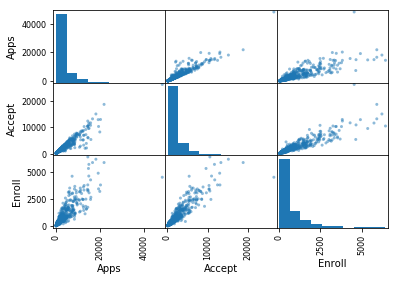

In [36]:
pd.plotting.scatter_matrix(college.iloc[:,2:5]);

<i>
(c) (iii) Use the boxplot attribute to produce side-by-side boxplots of Room.Board versus Private. Hint: Use the column option to select the continuous variable and the by option to select the categorical variable.
</i>

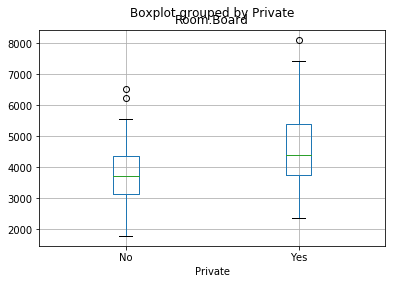

In [37]:
college.boxplot(column='Room.Board', by='Private');

<i>
(c) (iv) Create a new qualitative variable, called Elite, by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.
</i>


~~~
Elite = np.array([False]∗len(college))
Elite [ college [ ’Top10perc ’ ] > 50] = True
college[’Elite’] = pd.Series(Elite, index=college.index)
~~~

<i>
Use the describe attribute to see how many elite universities there are. For this you might find the option include=[’bool’] useful. Now use the boxplot attribute to produce side-by-side boxplots of Room.Board versus Elite.
</i>

In [38]:
Elite = np.array([False]*len(college))
Elite[college['Top10perc'] > 50] = True
college['Elite'] = pd.Series(Elite, index=college.index)

In [39]:
college.describe(include=['bool'])

,Elite
count,777
unique,2
top,False
freq,699


Appears there are 777 - 699 = <b>78</b> Elite colleges.

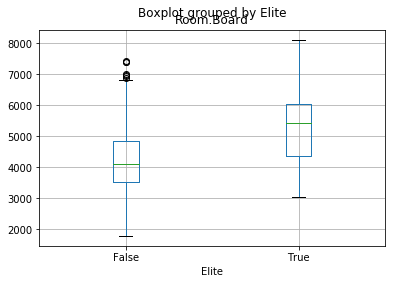

In [40]:
college.boxplot(column='Room.Board', by='Elite');

<i>
(c) (v) Use the hist attribute to produce some histograms with differing numbers of bins for a few of the quantitative variables. You may find the layout option useful: it will divide the figure into regions so that plots can be made simultaneously.
</i>

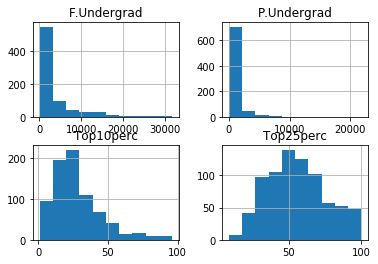

In [41]:
college.hist(column=['F.Undergrad','P.Undergrad','Top10perc','Top25perc'], layout=(2,2));

<i>(c) (vi) Continue exploring the data, and provide a brief summary of what you discover.</i>

In [42]:
college['Acceptance.Rate'] = college['Accept']/college['Apps']

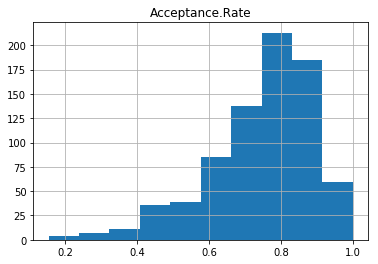

In [44]:
college.hist(column='Acceptance.Rate');

In [45]:
college.sort_values(['Acceptance.Rate']).head(10)

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite,Acceptance.Rate
459,Princeton University,Yes,13218,2042,1153,90,98,4540,146,19900,...,675,1575,91,96,8.4,54,28320,99,True,0.154486
250,Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,...,500,1920,97,97,9.9,52,37219,100,True,0.156149
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,...,630,2115,96,96,5.8,49,40386,99,True,0.229145
16,Amherst College,Yes,4302,992,418,83,96,1593,5,19760,...,660,1598,93,98,8.4,63,21424,100,True,0.230590
70,Brown University,Yes,12586,3239,1462,87,95,5643,349,19528,...,720,1100,99,100,7.6,39,20440,97,True,0.257349
221,Georgetown University,Yes,11115,2881,1390,71,93,5881,406,18300,...,670,1700,91,92,7.2,27,19635,95,True,0.259199
158,Dartmouth College,Yes,8587,2273,1087,87,99,3918,32,19545,...,550,1100,95,99,4.7,49,29619,98,True,0.264702
174,Duke University,Yes,13789,3893,1583,90,98,6188,53,18590,...,625,1162,95,96,5.0,44,27206,97,True,0.282326
144,Columbia University,Yes,6756,1930,871,78,96,3376,55,18624,...,550,300,97,98,5.9,21,30639,99,True,0.285672
763,Williams College,Yes,4186,1245,526,81,96,1988,29,19629,...,500,1200,94,99,9.0,64,22014,99,True,0.297420


The above shows the top 10 schools by lowest acceptance rate. We see that Princeton has the lowest acceptance rate at 15%. The histogram shows the median acceptance rate is approximately 80%. 

I would be curious to know what the data specifications were (year of collection, what they're counting) because they don't appear to align with current statistics for undergraduate admissions.

## Problem 6

<i>This exercise involves the Auto data set found here: http://www-bcf.usc.edu/~gareth/ISL/Auto.data. Make sure that the missing values have been removed from the data.
</i>

In [46]:
auto = pd.read_csv('./Auto.data.txt', sep='\s+')
auto = auto.replace('?', np.nan).dropna().reset_index(drop=True)

In [47]:
auto['horsepower'] = auto['horsepower'].astype('float64')

In [48]:
auto.shape

(392, 9)

In [49]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<i>(a) Which of the predictors are quantitative, and which are qualitative?</i>

Quantitative:
- mpg
- displacement
- horsepower
- weight
- acceleration

Qualitative:
- origin
- cylinders (could also be treated as quantitative)
- year (could also be treated as quantitative)
- name

<i>(b) What is the range of each quantitative predictor?</i>

In [52]:
auto[['mpg','displacement','horsepower','weight','acceleration']]\
.describe().loc[['min','max'],:]\
.transpose()\
.assign(range = lambda x: x['max'] - x['min'])

,min,max,range
mpg,9.0,46.6,37.6
displacement,68.0,455.0,387.0
horsepower,46.0,230.0,184.0
weight,1613.0,5140.0,3527.0
acceleration,8.0,24.8,16.8


<i>(c) What is the mean and standard deviation of each quantitative predictor?</i>

In [54]:
auto[['mpg','displacement','horsepower','weight','acceleration']]\
.describe().loc[['mean','std'],:]\
.transpose()

,mean,std
mpg,23.445918,7.805007
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864


<i>(d) Now remove the last 35 observations. What is the range, mean, and standard deviation of each quantitative predictor in the subset of the data that remains?</i>

In [55]:
auto.loc[0:len(auto)-35-1,:]\
[['mpg','displacement','horsepower','weight','acceleration']]\
.describe().loc[['min','max','mean','std'],:]\
.transpose()

,min,max,mean,std
mpg,9.0,46.6,22.744538,7.606525
displacement,68.0,455.0,199.477591,106.868590
horsepower,46.0,230.0,106.442577,39.518879
weight,1613.0,5140.0,3018.467787,868.021337
acceleration,8.0,24.8,15.447059,2.782504


<i>(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.</i>

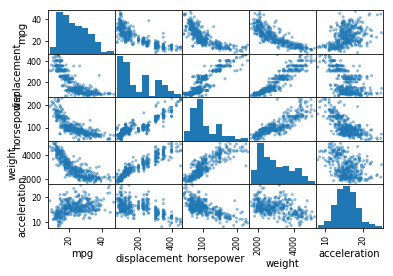

In [56]:
pd.plotting.scatter_matrix(auto.loc[:,['mpg','displacement','horsepower','weight','acceleration']]);

In the scatter matrix above, we see that a few of the quantitative variables are correlated:
- There are positive relationships between:
    - horsepower and displacement
    - weight and displacement
    - weight and horsepower


- There are negative relationships between:
    - displacement and mpg
    - horsepower and mpg
    - weight and mpg
    - displacement and acceleration
    - horsepower and acceleration

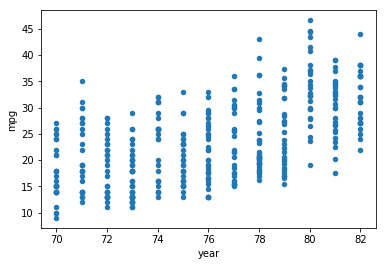

In [57]:
auto.plot.scatter(x='year',y='mpg');

Here when we can see fuel efficiency has increased over the years.

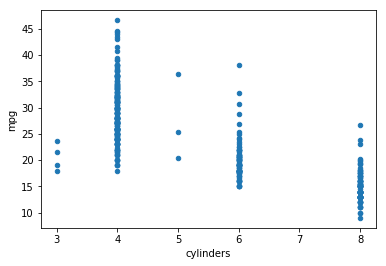

In [67]:
auto.plot.scatter(x='cylinders',y='mpg');

Here when we can see fuel efficiency appears to decrease as the number of cylinders increase.

<i>(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.</i>

Yes - there appears to be an association with displacement, horsepower, weight, the year of manufacture, and the number of cylinders.

In [65]:
auto.corr().loc[:,'mpg']

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
year            0.580541
origin          0.565209
Name: mpg, dtype: float64

We see in the above that there appears to be strong correlations between mpg and the aforementioned variables. We chose not to include origin, as judging from the plot I did not feel there was a strong case to include country of origin in predicting MPG.

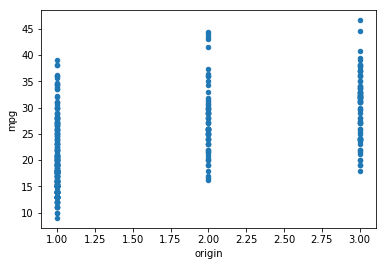

In [66]:
auto.plot.scatter(x='origin',y='mpg');